# Prediction of parking violations in New York City


In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from datetime import datetime, date, time
import datetime
from IPython.display import Image
from sqlalchemy import create_engine
import sqlite3
import csv
import time

In [2]:
%matplotlib inline

In [3]:
file='E:\\DS18\\datacamp\\NYC\\ParkingViolations2017.csv'

In [4]:
db=sqlite3.connect('ParkingViolations2017.db')
c=db.cursor()
c.execute("CREATE TABLE ParkingViolations2017 (Summons_Number INT64, Registration_State  TEXT, Vehicle_Make TEXT,Issuer_Squad  TEXT)")
db.commit()


In [5]:
counter = 0
db_list = []
with open(file) as infile:
    for line in infile:
  #      line = line.replace('"', '')
        data = line.split(",")
        if (counter > 0):

   
            summ_num=data[0]
            reg_state = data[2]
            
            make=data[7]
            issue_sq=data[18]
            db_list.append( (summ_num, reg_state, make,issue_sq) )
            
        counter += 1
print(len(db_list))

c.executemany("INSERT INTO ParkingViolations2017 VALUES (?, ?, ?, ?)", db_list)
df=pd.DataFrame(db_list)
print(df.info())
db.commit()
#db.close()

10803028
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10803028 entries, 0 to 10803027
Data columns (total 4 columns):
0    object
1    object
2    object
3    object
dtypes: object(4)
memory usage: 329.7+ MB
None


In [19]:
start = time.time()
c.execute("SELECT * FROM ParkingViolations2017 WHERE Issuer_Squad != ' ' ")
#new = pd.DataFrame(c.fetchall())
new=c.fetchall()
print(len(new))
#new=df.drop_duplicates()
#new=new.dropna(axis=1, how='all')
#print(new.info())
end = time.time()
elapsed = end - start
print(elapsed)

10803028



0000
A
B
H
M
L
D
C
N


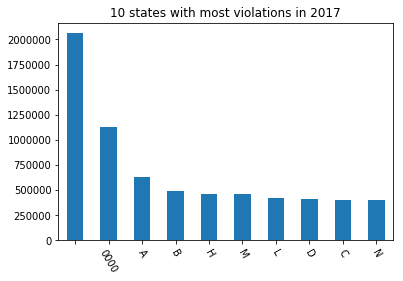

In [9]:
rank_st = new[3].value_counts()
rank_st.sort_values(ascending=False)
top10 = rank_st[:10]
top10.plot(kind="bar", title="10 states with most violations in 2017",rot=-60)

top10_list = top10.index
for idx in top10_list:
    print(str(idx))


# Parking tickets
Data set description : 

The City of Vancouver regulates parking to balance the needs of residents, commuters, and visitors.

This data set includes parking ticket records data on a year-by-year basis beginning in 2010.

Note: Ticket issued location information was aggregated to 100-block unit level.

Attributes:

    Hundred_Block: Block level of the street where the infraction occurred. For example: 1 Main Street means 100 Main Street.
    Street: Name of the street where the infraction occurred
    Date: Date the infraction occurred in month/day/year format
    Bylaw: Specific parking bylaw which the parking ticket was issued under
    Section: Specific section of the bylaw which the infraction pertains
    Status: Status of the parking ticket
            I = Issued
            W = Warning
            V = Void
            R = Cancelled due to Paid by Phone
    Description: Short description of the infraction

website for data:  http://data.vancouver.ca/datacatalogue/parking-tickets.htm


In [ ]:
#new['month'] = pd.DatetimeIndex(new['DATE']).month
#new['dayofweek']=pd.DatetimeIndex(new['DATE']).dayofweek

In [ ]:
new.info()

In the year of 2016, we can see from above figure that there are over 20,000 violations on Broadway Street W. and there are about 8500 violations on Alberni Street. To visually identify these 10 most violations streets, the google map is utilized to show these locations in city of Vancouver in Canada.

In [ ]:
Image(filename="C:/Users/VT/Datacamp/Tenviost.jpg")

From the map shown above, the most parking tickets issued is on the Broadway Stree W. and the third is issued on 4th Ave. W, these locations are on the southwest part of the Vancouver city. The other 7 most violations occurred on the center of the city. the wikipedia describes the Broadyway Street W as in the link: 
https://en.wikipedia.org/wiki/Broadway_(Vancouver)
along the street, there are  University of British Columbia (UBC), low-rise apartment blocks and small supermarkets and  rental suites. 
Therefore it is very buzziling area and there are lots of activities in these area and thereby leads lots of traffic and parking activities. The contribution of parking violation from university will be explored as the time vs violations # at these locations. 

In [ ]:
top1=new.loc[new['STREET']=='Broadway St. W.']
num=top1.groupby(['month'])['month'].count()
num.plot(kind="bar", title="Violations in 12 months on Broadway St. W.",rot=0)

The figure shown above is the 12 month violation information on Broadway St. W., it can be seen that during the summer months(June-September) the violations are the lowest for all year of 2016. This may be resulted from the during the summer season the UBC university is closed and therefore there are less automobiles near the street and less violations.

In [ ]:
bottom10 = rank_st[-10:]
bottom10.plot(kind="bar", title="10 streets with least violations",rot=-60)

Create the bar chart for column 'Street' and shown above are the least tickets issued 10 streets (they all had less than 1 ticket issued, really). 

In [ ]:
top10 = new['DESCRIPTION'].value_counts()
top10.sort_values(ascending=False)
top10 = top10[:10]
top10.plot(kind="pie")

Create pie chart for column 'description' to find the most popular reasons getting a ticket. As shown in pie chart, the flashing 4 zeros is the leading reason, meter ran out of money for driver to legally keep the spot. the No Stopping is the second leading cause for the tickets which is pretty tricky since by law it is illegal to pick up, dropoff people and load and unload things in this zone. 

In [ ]:
rank_top1=new.loc[new['STREET']==top10_list[0],'DESCRIPTION'].value_counts()
rank_top1.sort_values(ascending=False)
rank_top1[:5].plot(kind="pie", title='Violations on Broadway St.')

In [ ]:
rank_top2=new.loc[new['STREET']==top10_list[1],'DESCRIPTION'].value_counts()
rank_top2.sort_values(ascending=False)
rank_top2[:5].plot(kind="pie", title='Violations on Homer St.',fontsize=10)

In [ ]:
rank_top3=new.loc[new['STREET']==top10_list[2],'DESCRIPTION'].value_counts()
rank_top3.sort_values(ascending=False)
rank_top3[:5].plot(kind="pie", title='Violations on 4th Ave W.')

Above three pie charts tell that the flashing 4 zeros violation is the leading factor to get a tickets on streets where most violations occurred. Next we are going to explore the ranking of the flashing 4 zeros for all streets in the city. 

In [ ]:
rank_flash=new.loc[new['DESCRIPTION']=='FLASHING 4 ZEROS','STREET'].value_counts()
rank_flash.sort_values(ascending=False)
rank_flash[:10].plot(kind="bar", title="Ranking of Flashing 4 zeros on streets",rot=60)

From figure, it shows that the most flashing violations occurred on Broadway street, followed by Homer and 4the Ave street. Therefore, it is of high business values for parking meter companies to set up meters on these streets. By doing this parking meter comapnies will have better profits on these street and at the same time to get rid of extra meters on those streets having much fewer or none flashing violations. 

In [ ]:
rank_dayofweek = new['dayofweek'].value_counts()
rank_dayofweek.sort_values(ascending=False)
rank_dayofweek.plot(kind="bar", title="Violation # in day of week(Mon=0,Sun=6)",rot=0)
#The day of the week with Monday=0, Sunday=6


The figure above shows that most tickets were issued on Wednesday(over 70000 tickets issued), imaging on this hump day, people are super busy and getting really tired therefore it was quite easy for them to forget what happened to their cars that parked on streets.  On Saturday and Sunday there were least tickets issued this can be explained that most people are taken off during holidays and therefore there are much fewer people on streets. 